In [11]:
import numpy as np 
import os 
import struct 
import matplotlib.pyplot as plt 

In [2]:
def read_binary_file(file_path):
    try:
        with open(file_path, 'rb') as file:
            data = file.read()
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except IOError as e:
        print(f"Error reading file: {e}")
    return data

In [3]:
def convert_to_float(binary_data):
    float_values = struct.unpack('f' * (len(binary_data) // 4), binary_data)
    return float_values

In [4]:
def parse_coordinates(data):
    coordinates = []
    for i in range(0, len(data), 2):
        real = data[i]
        imag = data[i + 1]
        coordinates.append((real, imag))
    return coordinates

In [31]:
modulation_type = '16QAM'
file_path = 'snr_swep/equal_data-30.bin'
if os.path.isfile(file_path):
    binary_data = read_binary_file(file_path)
    float_values = convert_to_float(binary_data)
    coordinates = parse_coordinates(float_values)

In [32]:
print(np.shape(coordinates))
coordinates = np.array(coordinates)

(1536, 2)


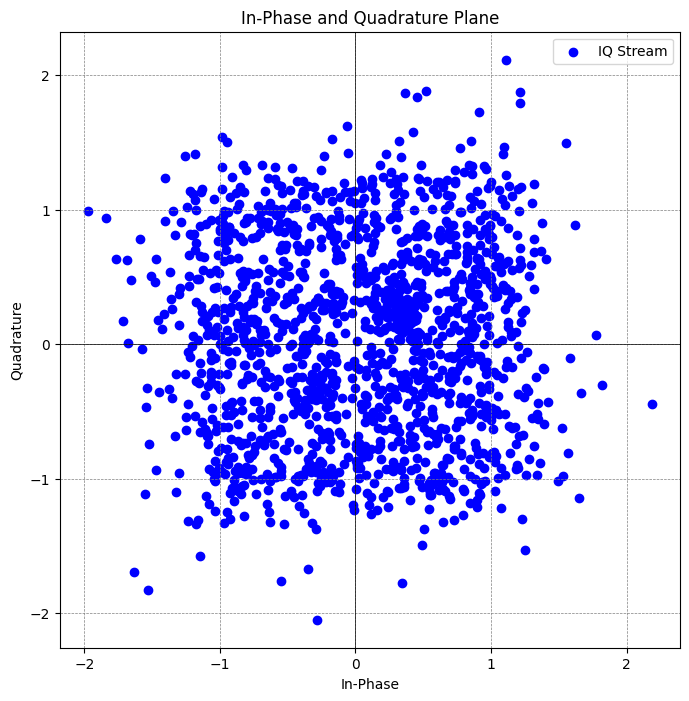

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1], label='IQ Stream', color='blue')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('In-Phase and Quadrature Plane')
plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()